*import Libraries*

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve 


## 2. **Data Loading and exploration and cleaning**
 ↪ Load the csv file with pandas 

 ↪ creating the dataframe and understanding the data present in the dataset using pandas
 

In [4]:
df=pd.read_csv('./bank-full.csv', sep=";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
df.shape

(45211, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [8]:
df.index

RangeIndex(start=0, stop=45211, step=1)

## Step 2: Encode Categorical Features
- We'll convert categorical features into numerical format using one-hot encoding.
- Encode Categorical  Features 
- separate features and target 

In [9]:
# One-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Display the encoded DataFrame
df_encoded.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,33,2,5,76,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
3,47,1506,5,92,1,-1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


## Step 3: Split the Data
- Split the dataset into features (X) and target (y), then into training and testing sets.

In [10]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = df_encoded.drop('y_yes', axis=1)  # Assuming 'y_yes' is the target
y = df_encoded['y_yes']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Step 4: Train Classification Models
- We'll train both Logistic Regression and Random Forest models.

In [11]:

# Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForestClassifier(random_state=42)

## Step 5: Evaluate the Models
- Evaluate the models using Confusion Matrix, F1-Score, and ROC Curve.

Logistic Regression Evaluation:
[[7748  204]
 [ 715  376]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7952
           1       0.65      0.34      0.45      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.66      0.70      9043
weighted avg       0.88      0.90      0.88      9043



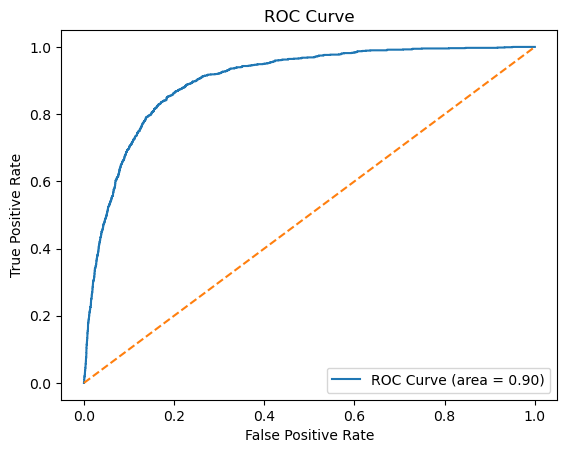

Random Forest Evaluation:
[[7737  215]
 [ 655  436]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7952
           1       0.67      0.40      0.50      1091

    accuracy                           0.90      9043
   macro avg       0.80      0.69      0.72      9043
weighted avg       0.89      0.90      0.89      9043



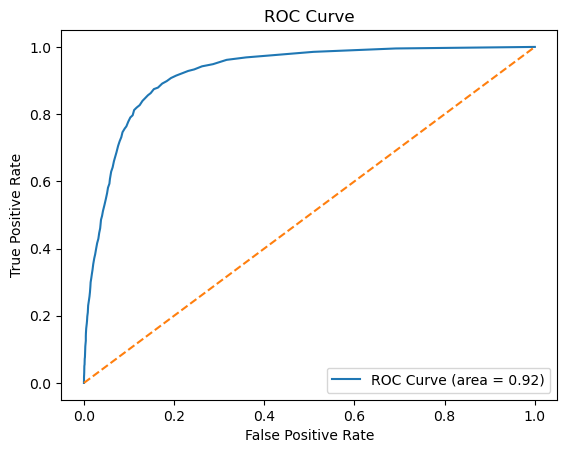

In [12]:
# Function to evaluate and plot ROC curve
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Confusion Matrix
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label='ROC Curve (area = {:.2f})'.format(roc_auc_score(y_test, y_pred_proba)))
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

# Evaluate both models
print("Logistic Regression Evaluation:")
evaluate_model(lr_model, X_test, y_test)

print("Random Forest Evaluation:")
evaluate_model(rf_model, X_test, y_test)

## Step 6: Explain Model Predictions with SHAP
- Using SHAP to explain model predictions:

In [ ]:
import shap
# Assuming rf_model is your trained Random Forest model and X_test is your test dataset

# Initialize SHAP explainer for the Random Forest model
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)

# Convert SHAP values to a DataFrame for visualization
shap_df = pd.DataFrame(shap_values, columns=X_test.columns)

# Calculate the mean absolute SHAP value for each feature
mean_shap = shap_df.abs().mean().sort_values(ascending=False)

# Create a bar chart
fig = px.bar(mean_shap, x=mean_shap.index, y=mean_shap.values, title='Mean SHAP Values by Feature')
fig.update_layout(xaxis_title='Features', yaxis_title='Mean SHAP Value')
st.plotly_chart(fig)

## Summary
- **Loaded and Explored Data:** Displayed the dataset's structure and basic statistics.
- **Encoded Features:** Categorical features were transformed into numerical format.
- **Trained Models:** Implemented Logistic Regression and Random Forest classifiers.
- **Evaluated Models:** Used confusion matrices, F1-scores, and ROC curves to assess performance.
- **Explained Predictions:** Utilized SHAP to interpret model predictions for five instances.